<a href="https://colab.research.google.com/github/heidaralavi/working-with-persian-text/blob/main/preprocessing%20on%20text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#%debug

In [1]:
!pip install nltk

In [2]:
!pip install hazm

     |████████████████████████████████| 316 kB 12.2 MB/s 
     |████████████████████████████████| 233 kB 6.4 MB/s 
     |████████████████████████████████| 1.4 MB 35.5 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394487 sha256=ffa776e69f156fc6ea150c8c988549ee33e15563d9cbb13f753de1e37fb68904
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154290 sha256=aafbcbdc4774bc61746b89cf5c1d51df19e35d4ac2bc6a68ca1448bfb65f83f8
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [3]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [12]:
from __future__ import unicode_literals
from hazm import *

In [5]:
#%debug

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df=pd.read_excel('data.xlsx')

In [8]:
df.head()

,شماره درخواست,کد ماشین,تاریخ خرابی,وضعیت,نام ماشین,نوع درخواست,ق.ص. درخواست,علت خرابی,مدت انجام كار,شرح مشكل,تاريخ شروع,شرح_كد دوره توقف (واقعي ) 2,شرح_محل استقرار
0,93078329,NaN,14000608,درحال بررسي,NaN,عادي,هيدروليك و روانكاري,NaN,0,سيستم گريس بالميل آلارم دارد و اسپري انجام نمي...,0,نامشخص,930BM1.xxxx
1,93078330,NaN,14000608,درحال بررسي,NaN,عادي,هيدروليك و روانكاري,NaN,0,سيستم گريس ديسك يك آلارم دارد .,0,نامشخص,610PE1.XXXX
2,93078331,NaN,14000608,درحال بررسي,NaN,عادي,هيدروليك و روانكاري,NaN,0,نشتي روغن از پمپ مسير شماره يك هيدروليك 610wb,0,نامشخص,610BW8
3,93078474,NaN,14000612,درحال بررسي,NaN,عادي,هيدروليك و روانكاري,NaN,0,سيستم گريسكاري بالميل آلارم دارد,0,نامشخص,930BM1.xxxx
4,93078633,NaN,14000616,درحال بررسي,NaN,عادي,هيدروليك و روانكاري,NaN,0,دماي بيرينگ سمت موتور 710fn4 بالاست و سطح روغن...,0,نامشخص,710FN4.xxxx


In [13]:
normalizer = Normalizer()

cols=['وضعیت','نوع درخواست','ق.ص. درخواست','شرح مشكل','شرح_كد دوره توقف (واقعي ) 2']
for col in cols:
    x=[]
    for item in df[col].values:
        x.append(normalizer.normalize(item))
    df[col]=x


In [14]:
df

,شماره درخواست,کد ماشین,تاریخ خرابی,وضعیت,نام ماشین,نوع درخواست,ق.ص. درخواست,علت خرابی,مدت انجام كار,شرح مشكل,تاريخ شروع,شرح_كد دوره توقف (واقعي ) 2,شرح_محل استقرار
0,93078329,NaN,14000608,درحال بررسی,NaN,عادی,هیدرولیک و روانکاری,NaN,0,سیستم گریس بالمیل آلارم دارد و اسپری انجام نمی...,0,نامشخص,930BM1.xxxx
1,93078330,NaN,14000608,درحال بررسی,NaN,عادی,هیدرولیک و روانکاری,NaN,0,سیستم گریس دیسک یک آلارم دارد.,0,نامشخص,610PE1.XXXX
2,93078331,NaN,14000608,درحال بررسی,NaN,عادی,هیدرولیک و روانکاری,NaN,0,نشتی روغن از پمپ مسیر شماره یک هیدرولیک ۶۱۰wb,0,نامشخص,610BW8
3,93078474,NaN,14000612,درحال بررسی,NaN,عادی,هیدرولیک و روانکاری,NaN,0,سیستم گریسکاری بالمیل آلارم دارد,0,نامشخص,930BM1.xxxx
4,93078633,NaN,14000616,درحال بررسی,NaN,عادی,هیدرولیک و روانکاری,NaN,0,دمای بیرینگ سمت موتور ۷۱۰fn۴ بالاست و سطح روغن...,0,نامشخص,710FN4.xxxx
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6145,93079110,NaN,14000630,درحال انجام,NaN,عادی,ابزاردقیق,NaN,120,سنسور نشان‌گر موقعیت WB بعضی مواقع گیر میکند و...,0,توقف گرم ۱۱۰,610WB1.xxxx
6146,93079611,NaN,14000715,پایان یافته,NaN,عادی,هیدرولیک و روانکاری,NaN,60,لوله گریس پالت ۱۵ از طوقه بیرونی کنده شده است:,0,نامشخص,730AN1.XXXX
6147,93078715,NaN,14000618,پایان یافته,NaN,عادی,هیدرولیک و روانکاری,NaN,60,سیستم گریس چندین مرتبه تریپ خورد.,0,نامشخص,930BM1.xxxx
6148,93081354,NaN,14000908,پایان یافته,NaN,عادی,هیدرولیک و روانکاری,NaN,120,لوله گریس بیرونی پالت ۲۶ شکسته است,0,نامشخص,730AN1.XXXX


In [16]:
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize

#stop_words = set(stopwords.words('arabic'))

In [17]:
df_stop_words=pd.read_csv('stopwords.dat',header=None, encoding='utf-8',)
stop_words=df_stop_words.iloc[:,0].tolist()
#stop_words.update(st_word)
stop_words

['و',
 'در',
 'به',
 'از',
 'که',
 'این',
 'را',
 'با',
 'است',
 'برای',
 'آن',
 'یک',
 'خود',
 'تا',
 'کرد',
 'بر',
 'هم',
 'نیز',
 'گفت',
 'می\u200cشود',
 'وی',
 'شد',
 'دارد',
 'ما',
 'اما',
 'یا',
 'شده',
 'باید',
 'هر',
 'آنها',
 'بود',
 'او',
 'دیگر',
 'دو',
 'مورد',
 'می\u200cکند',
 'شود',
 'کند',
 'وجود',
 'بین',
 'پیش',
 'شده_است',
 'پس',
 'نظر',
 'اگر',
 'همه',
 'یکی',
 'حال',
 'هستند',
 'من',
 'کنند',
 'نیست',
 'باشد',
 'چه',
 'بی',
 'می',
 'بخش',
 'می\u200cکنند',
 'همین',
 'افزود',
 'هایی',
 'دارند',
 'راه',
 'همچنین',
 'روی',
 'داد',
 'بیشتر',
 'بسیار',
 'سه',
 'داشت',
 'چند',
 'سوی',
 'تنها',
 'هیچ',
 'میان',
 'اینکه',
 'شدن',
 'بعد',
 'جدید',
 'ولی',
 'حتی',
 'کردن',
 'برخی',
 'کردند',
 'می\u200cدهد',
 'اول',
 'نه',
 'کرده_است',
 'نسبت',
 'بیش',
 'شما',
 'چنین',
 'طور',
 'افراد',
 'تمام',
 'درباره',
 'بار',
 'بسیاری',
 'می\u200cتواند',
 'کرده',
 'چون',
 'ندارد',
 'دوم',
 'بزرگ',
 'طی',
 'حدود',
 'همان',
 'بدون',
 'البته',
 'آنان',
 'می\u200cگوید',
 'دیگری',
 'خواهد_شد',


In [22]:
!pip install arabic_reshaper
!pip install python-bidi

In [23]:
import arabic_reshaper
from bidi.algorithm import get_display
import re

In [24]:
cols=['شرح مشكل']
for col in cols:
    x=[]
    for item in df[col].values:
        words=word_tokenize(item)
        w=[]
        for word in words:
                if re.search('[\u0600-\u06FF]',word):
                  w.append(word)
        x.append(w)
    df[col]=x

In [25]:
df

,شماره درخواست,کد ماشین,تاریخ خرابی,وضعیت,نام ماشین,نوع درخواست,ق.ص. درخواست,علت خرابی,مدت انجام كار,شرح مشكل,تاريخ شروع,شرح_كد دوره توقف (واقعي ) 2,شرح_محل استقرار
0,93078329,NaN,14000608,درحال بررسی,NaN,عادی,هیدرولیک و روانکاری,NaN,0,"[سیستم, گریس, بالمیل, آلارم, دارد, و, اسپری, ا...",0,نامشخص,930BM1.xxxx
1,93078330,NaN,14000608,درحال بررسی,NaN,عادی,هیدرولیک و روانکاری,NaN,0,"[سیستم, گریس, دیسک, یک, آلارم, دارد]",0,نامشخص,610PE1.XXXX
2,93078331,NaN,14000608,درحال بررسی,NaN,عادی,هیدرولیک و روانکاری,NaN,0,"[نشتی, روغن, از, پمپ, مسیر, شماره, یک, هیدرولی...",0,نامشخص,610BW8
3,93078474,NaN,14000612,درحال بررسی,NaN,عادی,هیدرولیک و روانکاری,NaN,0,"[سیستم, گریسکاری, بالمیل, آلارم, دارد]",0,نامشخص,930BM1.xxxx
4,93078633,NaN,14000616,درحال بررسی,NaN,عادی,هیدرولیک و روانکاری,NaN,0,"[دمای, بیرینگ, سمت, موتور, ۷۱۰, fn۴, بالاست, و...",0,نامشخص,710FN4.xxxx
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6145,93079110,NaN,14000630,درحال انجام,NaN,عادی,ابزاردقیق,NaN,120,"[سنسور, نشان‌گر, موقعیت, بعضی, مواقع, گیر, میک...",0,توقف گرم ۱۱۰,610WB1.xxxx
6146,93079611,NaN,14000715,پایان یافته,NaN,عادی,هیدرولیک و روانکاری,NaN,60,"[لوله, گریس, پالت, ۱۵, از, طوقه, بیرونی, کنده,...",0,نامشخص,730AN1.XXXX
6147,93078715,NaN,14000618,پایان یافته,NaN,عادی,هیدرولیک و روانکاری,NaN,60,"[سیستم, گریس, چندین, مرتبه, تریپ, خورد]",0,نامشخص,930BM1.xxxx
6148,93081354,NaN,14000908,پایان یافته,NaN,عادی,هیدرولیک و روانکاری,NaN,120,"[لوله, گریس, بیرونی, پالت, ۲۶, شکسته_است]",0,نامشخص,730AN1.XXXX


In [26]:
cols=['شرح مشكل']
for col in cols:
    y=[]
    for items in df[col].values:
        x=[]
        for item in items:
            if item not in stop_words:
                x.append(item)
        y.append(x)
        #print(y)
    df[col]=y
            
len(y)

6150

In [27]:
df

,شماره درخواست,کد ماشین,تاریخ خرابی,وضعیت,نام ماشین,نوع درخواست,ق.ص. درخواست,علت خرابی,مدت انجام كار,شرح مشكل,تاريخ شروع,شرح_كد دوره توقف (واقعي ) 2,شرح_محل استقرار
0,93078329,NaN,14000608,درحال بررسی,NaN,عادی,هیدرولیک و روانکاری,NaN,0,"[سیستم, گریس, بالمیل, آلارم, اسپری, انجام, نمی...",0,نامشخص,930BM1.xxxx
1,93078330,NaN,14000608,درحال بررسی,NaN,عادی,هیدرولیک و روانکاری,NaN,0,"[سیستم, گریس, دیسک, آلارم]",0,نامشخص,610PE1.XXXX
2,93078331,NaN,14000608,درحال بررسی,NaN,عادی,هیدرولیک و روانکاری,NaN,0,"[نشتی, روغن, پمپ, مسیر, شماره, هیدرولیک, ۶۱۰]",0,نامشخص,610BW8
3,93078474,NaN,14000612,درحال بررسی,NaN,عادی,هیدرولیک و روانکاری,NaN,0,"[سیستم, گریسکاری, بالمیل, آلارم]",0,نامشخص,930BM1.xxxx
4,93078633,NaN,14000616,درحال بررسی,NaN,عادی,هیدرولیک و روانکاری,NaN,0,"[دمای, بیرینگ, موتور, ۷۱۰, fn۴, بالاست, سطح, ر...",0,نامشخص,710FN4.xxxx
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6145,93079110,NaN,14000630,درحال انجام,NaN,عادی,ابزاردقیق,NaN,120,"[سنسور, نشان‌گر, موقعیت, مواقع, گیر, میکند, ان...",0,توقف گرم ۱۱۰,610WB1.xxxx
6146,93079611,NaN,14000715,پایان یافته,NaN,عادی,هیدرولیک و روانکاری,NaN,60,"[لوله, گریس, پالت, ۱۵, طوقه, بیرونی, کنده]",0,نامشخص,730AN1.XXXX
6147,93078715,NaN,14000618,پایان یافته,NaN,عادی,هیدرولیک و روانکاری,NaN,60,"[سیستم, گریس, چندین, مرتبه, تریپ, خورد]",0,نامشخص,930BM1.xxxx
6148,93081354,NaN,14000908,پایان یافته,NaN,عادی,هیدرولیک و روانکاری,NaN,120,"[لوله, گریس, بیرونی, پالت, ۲۶, شکسته_است]",0,نامشخص,730AN1.XXXX


In [30]:
from pandas.core.frame import DataFrame
df3=pd.DataFrame()
df3['asset']=df['شرح_محل استقرار']
df3.append(pd.DataFrame(df.iloc[:,9].tolist()))


,asset,0,1,2,3,4,5,6,7,8,...,82,83,84,85,86,87,88,89,90,91
0,930BM1.xxxx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,610PE1.XXXX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,610BW8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,930BM1.xxxx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,710FN4.xxxx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6145,NaN,سنسور,نشان‌گر,موقعیت,مواقع,گیر,میکند,انحراف,نوار,میشود,...,None,None,None,None,None,None,None,None,None,None
6146,NaN,لوله,گریس,پالت,۱۵,طوقه,بیرونی,کنده,None,None,...,None,None,None,None,None,None,None,None,None,None
6147,NaN,سیستم,گریس,چندین,مرتبه,تریپ,خورد,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6148,NaN,لوله,گریس,بیرونی,پالت,۲۶,شکسته_است,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [31]:
assets = df3['asset'].unique()

In [32]:
assets

array(['930BM1.xxxx', '610PE1.XXXX', '610BW8', '710FN4.xxxx',
       '710TG1.xxxx', '610WB1.xxxx', '720KL1.xxxx', '710EP2.ME05',
       '150RL1.xxxx', '110ST1.xxxx', '730AN1.XXXX', '610PE4.XXXX',
       '710FN1.xxxx', '1110LE1.XXXX', '310SL1.XXXX', '520MX1.xxxx', '730',
       '950FT1.xxxx', '120TT1', 'BALING MONITORING ROOM',
       'C410-Plant Office Pamidco', '820CL01', '520MX01.LI01',
       '730WS1.xxxx', '500', '150TT1', '950VP2.xxxx', '950FT2.xxxx',
       'C410-Plant Office', '610SU', '930PI1.AA01', '740VS2.XXXX', '600',
       '520PL3.xxxx', '940PS10.ME01', '740PC1.XXXX', '950TH1.xxxx',
       '510BI1.xxxx', '110WD1.XXXX', '710FN2.xxxx', 'BALLINGSERVER.IT',
       '130TS1.XXXX', '120RR1.BU01.XXXX', '910BC3.XXXX', '110MO1.PU03',
       '160HO01.VIB.ME03', '610RF1.ME17', 'ER311T01', '1400FI.XXXX',
       '830BC1.ME01', '120BC5.ME01', '150RL1.ME01', '150RL1.ME02',
       '150BC1.XXXX', '120MD1.XXXX', '940TN3.AA01', '150WF1.AA1',
       '110BC1', '710BE1.xxxx', '930BI1.XXXX', '160

In [33]:
gb= df3.groupby('asset')    
for name, group in gb:
    print(len(group))

1
4
7
1
1
1
1
1
2
1
3
4
6
4
1
1
4
1
1
30
2
19
32
1
1
4
2
3
3
2
2
1
1
1
1
1
2
2
1
1
5
1
1
1
1
2
3
33
1
8
8
5
1
2
2
3
99
1
98
4
34
32
1
4
2
1
20
1
3
2
1
4
1
5
6
2
1
1
1
1
4
1
39
2
3
3
4
5
5
10
7
1
5
1
2
1
4
4
1
2
2
2
4
8
8
1
8
1
6
2
6
1
1
1
2
4
1
1
3
5
4
2
4
9
6
1
6
7
2
1
1
1
1
4
1
4
1
21
1
9
2
12
1
9
1
3
1
5
2
1
10
1
2
8
1
1
5
1
8
7
5
3
2
23
4
17
8
2
1
2
1
3
21
20
23
1
1
5
13
9
6
1
1
53
13
40
3
2
1
1
3
3
1
5
2
1
7
1
1
2
1
3
2
2
1
1
3
2
2
23
1
4
3
1
3
3
1
2
1
1
2
1
1
1
1
5
2
1
1
1
2
1
2
1
2
4
1
2
3
1
1
1
1
2
1
1
2
8
2
2
1
1
2
2
1
1
1
1
1
2
1
1
3
2
1
2
2
1
7
11
2
2
1
2
1
7
3
3
1
8
1
3
4
2
1
5
1
1
10
1
3
2
1
1
1
1
1
1
2
4
2
3
1
1
1
2
1
1
1
17
9
6
3
3
1
3
5
1
6
8
3
1
4
2
1
1
6
1
5
2
4
4
1
8
9
7
1
43
1
22
2
5
1
1
10
1
1
1
1
3
1
5
1
10
1
7
1
2
13
6
7
5
1
4
16
1
24
2
1
23
1
21
1
2
2
44
13
19
16
4
6
10
2
1
1
2
11
2
1
2
10
1
3
1
17
18
1
2
6
1
3
9
2
1
12
1
7
1
1
8
1
1
2
1
1
5
1
5
1
1
1
1
7
1
1
4
7
4
4
5
2
3
2
3
2
1
52
1
11
17
1
3
1
23
1
8
11
3
1
1
1
3
27
1
16
1
3
6
1
1
2
3
1
1
6
5
1
1
14
2
5
28
1

In [34]:
for g in gb.groups.items():
    print(df3.loc[g[1]])   

Streaming output truncated to the last 5000 lines.
3144  1350CP4.xxxx
4653  1350CP4.xxxx
4660  1350CP4.xxxx
5195  1350CP4.xxxx
5720  1350CP4.xxxx
5721  1350CP4.xxxx
        asset
3675  1350EF1
             asset
2275  1350PI1.xxxx
2289  1350PI1.xxxx
4659  1350PI1.xxxx
     asset
4195  1360
             asset
2187  1360CD3.CE01
2570  1360CD3.CE01
2625  1360CD3.CE01
3692  1360CD3.CE01
5237  1360CD3.CE01
             asset
2830  1360CP1.CE01
2832  1360CP1.CE01
             asset
2181  1360CP1.ME01
             asset
2240  1360CP1.xxxx
2328  1360CP1.xxxx
2330  1360CP1.xxxx
3670  1360CP1.xxxx
3694  1360CP1.xxxx
3716  1360CP1.xxxx
4134  1360CP1.xxxx
5676  1360CP1.xxxx
5684  1360CP1.xxxx
5693  1360CP1.xxxx
             asset
5670  1360CP2.ME01
             asset
3302  1360CP2.ME02
5176  1360CP2.ME02
             asset
2236  1360CP2.xxxx
2237  1360CP2.xxxx
2340  1360CP2.xxxx
3316  1360CP2.xxxx
4147  1360CP2.xxxx
4665  1360CP2.xxxx
4717  1360CP2.xxxx
5240  1360CP2.xxxx
             asset
2280  

In [35]:
for group, dataframe in df3.groupby('asset'):
    dataframe.info()

Streaming output truncated to the last 5000 lines.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 4868 to 4868
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   asset   1 non-null      object
dtypes: object(1)
memory usage: 16.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 2004 to 3280
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   asset   3 non-null      object
dtypes: object(1)
memory usage: 48.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 2000 to 3824
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   asset   4 non-null      object
dtypes: object(1)
memory usage: 64.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 2002 to 2019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----

In [37]:
stemmer = Stemmer()
lemmatizer = Lemmatizer()
normalizer = Normalizer()

In [45]:
for token in df3.iloc[:,1]:
    #token = normalizer.normalize(token)
    print("stem" + "-> "+ stemmer.stem(token))
    print("lemma" + "-> "+lemmatizer.lemmatize(token))
    print("\n")

IndexError: ignored

b'\xef\xba\x8f \xef\xba\x91\xef\xbb\xaa \xef\xba\x91\xef\xba\x8e \xef\xba\x91\xef\xba\x8e\xef\xba\x8f'


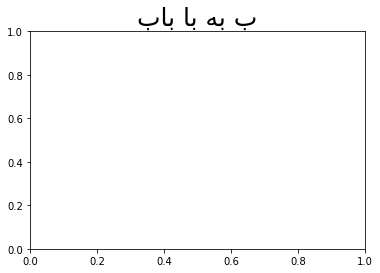

In [47]:
# -*- coding: utf-8 -*-
a='ب به با باب'
b= arabic_reshaper.reshape(a)
print(b.encode())


#print(unicode_string)
fig,ax = plt.subplots()
ax.set_title(b[::-1],fontsize=25)
plt.show()